In [1]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# Системы линейных уравнений

Рассмотрим *систему линейных уравнений* (с.л.у.)
$$
Ax = b,
$$
где $A$ – квадратная матрица порядка $n$, и $b$ – столбец высоты $n$.
Будем также считать, что матрица $A$ невырождена, т.е. ${\rm det} A \ne 0$.
В этом случае, мы знаем, решение с.л.у. существует и единственно. 
На практике очень часто возникают такие системы.

Решить с.л.у. можно с помощью функции `scipy.linalg.solve`:

In [2]:
A = np.array([[1, 2, 3], [4, 5, 1], [2, 4, 1]])
b = np.array([0, 5, 5])
x = linalg.solve(A, b)
x

array([-1.,  2., -1.])

Сделаем проверку:

In [3]:
A@x

array([0., 5., 5.])

В функции `scipy.linalg.solve` специальный вариант *метода Гаусса* для решения с.л.у. – так называемое $LU$-*разложение*.

Также посмотрим на величину определителя:

In [4]:
linalg.det(A)

15.000000000000002

Разумеется, точное значение определителя равно $15$. Пренебрежимая ошибка возникла в результате округления в процессе вычисления определителя.

Альтернативный способ найти решение с.л.у. – метод обратной матрицы:
$$
x = A^{-1}b.
$$
Обратную матрицу можно найти с помощью функции `scipy.linalg.inv`:

In [5]:
linalg.inv(A)

array([[ 0.06666667,  0.66666667, -0.86666667],
       [-0.13333333, -0.33333333,  0.73333333],
       [ 0.4       ,  0.        , -0.2       ]])

In [6]:
linalg.inv(A)@b

array([-1.,  2., -1.])

Вычисление обратной матрицы требует большего времени, чем собственно нахождение решения с.л.у., поэтому на практике к методу обратной матрицы прибегают достаточно редко.

## Нормы векторов

*Норма* в пространстве ${\bf R}^n$ – это произвольная функция, ставящая в соответствие каждому вектору $x \in {\bf R}^n$ неотрицательное вещественное число обозначаемое $\|x\|$ или $|x|$, так, что

* $\|x\| \ge 0$, причем $\|x\| = 0$ тогда и только тогда, когда $x=0$;
* $\|\alpha\cdot x\| = |\alpha| \cdot \|x\|$ для любого числа (скаляра) $\alpha$; 
* $\|x + y\| \le \|x\| + \|y\|$ (*неравенство треугольника*)

для любых векторов $x$, $y$ и любого числа $\alpha$.

Норма вектора характеризует, насколько компоненты вектора велики по абсолютному значению (модулю).
Норма играет в пространстве ${\bf R}^n$ примерно ту же роль, что модуль для вещественных чисел.

Примером нормы в арифметическом пространстве может служить функция (*норма Минковского*)
$$
\|x\|_p = (|x_1|^p + |x_2|^p + \dots + |x_n|^p)^{1/p}, 
$$
где $x=(x_1,x_2,\dots,x_n)^{\rm T}$, $p\ge 1$. При $p=1,2$ и при $p\to\infty$ получаем соответственно *манхеттенскую* $\|x\|_1$, *евклидову* 
$\|x\|_2$ и *чебышеву* $\|x\|_{\infty}$ нормы,
которые чаще других используются на практике:

* $\|x\|_1 = |x_1| + |x_2| + \dots + |x_n|$, 
* $\|x\|_2 = \sqrt{|x_1|^2 + |x_2|^2 + \dots + |x_n|^2}= \sqrt{x^{\rm T} x}$, 
* $\|x\|_{\infty} = \max\{ |x_1|, |x_2|, \dots , |x_n| \}$.

Если в ${\bf R}^n$ введена норма, то в ${\bf R}^n$ можно определить понятие *расстояния* между векторами (точками) как норму разности между этими векторами:
$$
\rho(x, y) = \|x-y\|.
$$
В частности, если используется евклидова норма, то расстояние – это (обычное) *евклидово расстояние*:
$$
\rho_2(x, y) = \|x-y\|_2 = \sqrt{\sum_{j=1}^n (x_j - y_j)^2}.
$$

Вычислить норму вектора можно с помощью функции `scipy.linalg.norm`. По умолчанию вычисляется евклидова норма:

In [7]:
x = np.array([2, -2, -1])
linalg.norm(x)

3.0

В качестве второго параметра можно указать значение $p$:

In [8]:
linalg.norm(x, 1), linalg.norm(x, 2), linalg.norm(x, np.Inf)

(5.0, 3.0, 2.0)

Какую конкретно норму использовать – зависит от приложения, но часто это не столь важно и можно использовать любую норму.

## Ошибки при решении с.л.у.

Норма вектора позволяет ввести понятие абсолютной и относительной ошибок при приближении одного вектора другим. Здесь действуем по аналогии со скалярами (обычными числами), но вместо абсолютных значений рассматриваем нормы.

Пусть $x$ – некоторый вектор в ${\bf R}^n$, а $\widetilde{x}$ – другой вектор в ${\bf R}^n$, рассматриваемый как приближение к $x$. Тогда *абсолютной ошибкой* называется число
$$
   \|\Delta x\| = \|\widetilde{x} - x\|,
$$
а *относительной ошибкой* - число
$$
   \frac{\|\Delta x\|}{\|x\|} = \frac{\|\widetilde{x} - x\|}{\|x\|}.
$$

В частности, если в качестве нормы мы берем манхеттеновскую норму, то абсолютная ошибка – это сумма всех ошибок в каждой компоненте, а если рассматривается чебышева норма, то абсолютная ошибка – максимальная из ошибок по всем компонентам.

Проведем небольшой вычислительный эксперимент. Для этого сгенерируем случайную матрицу $A$ порядка $n=1000$, случайный вектор $x_{\rm prec}$ и по ним построим правую часть $b = Ax_{\rm prec}$. Построенную таким образом с.л.у. решим с помощью `scipy.linalg.solve`. Вычисленное решение $x_{\rm comp}$ теперь мы можем сравнить с точным решением $x_{\rm prec}$:

In [9]:
n = 1000
A = random.rand(n, n)
x_prec = random.rand(n)
b = A@x_prec
x_comp = linalg.solve(A, b)
linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)

6.455001914632767e-13

Получилась относительная ошибка порядка $10^{-13}$, что означает, что компоненты решения содержат примерно по $13$ верных значащих цифр. Это совсем неплохо для такой большой системы. 

Попробуйте изменить (как уменьшить, так и увеличить) значение $n$ и проследите, как меняется точность решения и время, требуемое для его нахождения.

Теперь вместо случайных с.л.у. рассмотрим систему с матрицей специального вида.
Матрица $H_n=(h_{ij})$ порядка $n$ с элементами
$$
h_{ij}=\frac{1}{i+j-1}\quad (i=1,\dots, n; j=1,\dots, n)
$$
называется *матрицей Гильберта*.

Матрицу Гильберта заданного порядка можно построить с помощью функции `scipy.linalg.hilbert`:

In [10]:
linalg.hilbert(4)

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

Уже при $n=10$ получаем ошибку порядка $10^{-5}$:

In [11]:
n = 10
H = linalg.hilbert(n)
x_prec = random.rand(n)
b = H@x_prec
x_comp = linalg.solve(H, b)
linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)

0.00016912053480685986

При $n=11$ ошибка будет около $10^{-3}$, 
при $n=12$ – около $10^{-2}$.
а при $n=13$ – около $10^{-1}$.
При $n=14$ относительная ошибка превосходит $1$, что означает, что в ответе (по некоторым компонентам) у нас нет ни одной верной значащей цифры!

Результат может показаться удивительным, так как порядок системы чрезвычайно мал.

Объяснение данного явления – в *плохой обусловленности* матрицы Гильберта (а не в методе Гаусса!).
Давайте подробно разберемся в этом вопросе.

## Матричные нормы

Наряду с понятие векторных норма вводится понятие матричных норм.
Матричной нормой называется любая функция, ставящая в соответствие каждой матрице $A\in{\rm R}^{n\times n}$ неотрицательное вещественное число $\|A\|$, так, что

* $\|A\| \ge 0$, причем $\|A\| = 0$ тогда и только тогда, когда $A=0$;
* $\|\alpha\cdot A\| = |\alpha| \cdot \|A\|$ для любого числа (скаляра) $\alpha$; 
* $\|A + B\| \le \|A\| + \|B\|$ (*неравенство треугольника*);
* $\|A\cdot B\| \le \| A\| \cdot \| B\|$

для любых матриц $A$, $B$ и любого числа $\alpha$.

Матричную норму $\|A\|$, определенную соотношением
$$
\|A\| = \max_{x\ne 0} \frac{\|A x\|}{\|x\|} = \max_{\|x\| = 1} \|Ax\|,
$$
называют *подчиненной* векторной норме $\|x\|$.
Из этого определения, в частности, следует, что для любой квадратной матрицы $A$ и любого вектора $x$ справедливо
$\|Ax\| \le \|A\| \cdot \|x\|$.

Матричная норма имеет следующую простую геометрическую интерпретацию.
Говорят, что вектор $Ax$ получается *в результате действия матрицей* $A$ *на вектор* $x$ (или в результате применения к вектору $x$ линейного оператора, заданного матрицей $A$).
Таким образом, матричная норма показывает, в какое максимальное количество раз может увеличиться норма вектора $x$ при действии на него матрицей $A$. В связи с этим норму матрицы можно назвать еще ее *максимальным растяжением*.


Матричная норма, подчиненная норме $\|x\|_p$, обозначается $\|A\|_p$. Можно доказать, что
* $\|A\|_1 = \max\limits_j \sum\limits_{i=1}^n |a_{ij}|$ (*манхеттеновская* норма);
* $\|A\|_2 = \max\limits_j \sqrt{\lambda_j (A^{\rm T}A)}$, где $\lambda_j (A^{\rm T}A)$ $(j=1,2,\dots,n)$ – собственные числа матрицы $A^{\rm T}A$; матричную норму $\|A\|_2$ обычно называют *спектральной* (а не евклидовой);
* $\|A\|_{\infty} = \max\limits_i \sum\limits_{j=1}^n |a_{ij}|$ (*чебышева* норма).

Матричные нормы можно вычислить с помощью той же функции `norm`, что и векторные нормы:

In [12]:
A = np.array([[3, 1, -3], [-1, 0, 2], [2, 1, 3]])
A

array([[ 3,  1, -3],
       [-1,  0,  2],
       [ 2,  1,  3]])

In [13]:
linalg.norm(A, 1), linalg.norm(A, 2), linalg.norm(A, np.Inf)

(8.0, 4.962439804936852, 7.0)

## Число обусловленности матрицы

*Числом обусловленности*
невырожденной матрицы $A$ называется величина
$$
{\rm cond} A =  \| A \| \cdot \| A^{-1} \|.
$$
Если матрица $A$ вырождена, то полагают ${\rm cond} A = \infty$.
Из определения следует, что если матричная норма подчинена векторной, то
$$
{\rm cond} A =  {\max_{x\ne 0} \frac{\|A x\|}{\|x\|}} \left/ \,{\min_{x\ne 0}\frac{\|A x\|}{\|x\|}} \right..
$$
Таким образом, число обусловленности – это отношение максимального растяжения матрицы к ее минимальному растяжению.

Пусть в качестве матричной нормы $\|A\|$ используется
$\|A\|_p$. Тогда число обусловленности обозначим ${\rm cond}_p A$. Чаще других
используется матхеттенское, спектральное и чебышево числа
обусловленности: ${\rm cond}_1 A$, ${\rm cond}_2 A$, ${\rm cond}_{\infty} A$ соответственно.

Для спектрального числа обусловленности справедливо
$$
{\rm cond}_2 A = \sqrt{\frac{\max_j \lambda_j(A^{\rm T} A)}{\min_j \lambda_j(A^{\rm T} A)}}.
$$

Число обсуловленности можно рассматривать как меру близости матрицы к вырожденной. **Чем больше число обусловленности, тем матрица ближе к вырожденной**. У вырожденных матриц число обусловленности равно бесконечности.


In [14]:
A

array([[ 3,  1, -3],
       [-1,  0,  2],
       [ 2,  1,  3]])

В модуле `numpy.linalg` имеется функция `cond`, вычисляющая число обусловленности.
В модуле `scipy.linalg` подобной функции нет.
Создадим ее:

In [15]:
def cond(A, p=2):
    return linalg.norm(A, p)*linalg.norm(linalg.inv(A), p)

In [16]:
cond(A, 1), cond(A, 2), cond(A, np.Inf)

(44.0, 22.47352389341129, 43.750000000000014)

Обратите внимание на величину числа обусловленности случайной матрицы и матрицы Гильберта одного порядка:

In [17]:
n = 10
A = random.rand(n, n)
cond(A)

89.02201150065628

In [18]:
H = linalg.hilbert(n)
cond(H)

16024253208221.576

## Решение возмущенной системы

Наряду с исходной с.л.у. $Ax=b$ рассмотрим *возмущенную* с.л.у. $Ax=b+\Delta b$,
где $\Delta b$ – вектор-столбец.
Если $x$ – точное решение исходной системы, то пусть $x+\Delta x$ – точное решение возмущенной системы, т.е.
$$
A (x + \Delta x) = b + \Delta b.
$$

Наша цель – установить, как сильно относительная величина возмущения $\Delta b$ может повлиять на $\Delta x$.

Имеем 
$$
Ax=b, 
\qquad
\text{откуда}
\qquad
\|A\|\cdot\|x\|\ge\|b\|,
\qquad
\text{поэтому}
\qquad
\frac{1}{\|x\|}\le \frac{\|A\|}{\|b\|}.
$$
Вычитая из равенства $A (x + \Delta x) = b + \Delta b$ равенство $Ax=b$, получаем
$$
A\cdot \Delta x = \Delta b, 
\qquad
\text{откуда}
\qquad
\Delta x = A^{-1} \Delta b, 
\qquad
\text{поэтому}
\qquad
\|\Delta x\| \le \|A^{-1}\| \cdot \|\Delta b\|.
$$

Итак, имеем
$$
\frac{\|\Delta x\|}{\| x \|} \le \|A\|\cdot \|A^{-1}\| \cdot \frac{\|\Delta b\|}{\|b\|}.
$$

Обратим внимание, что $\|A\|\cdot \|A^{-1}\|$ это ${\rm cond} A$, поэтому
$$
\frac{\|\Delta x\|}{\| x \|} \le {\rm cond} A \cdot \frac{\|\Delta b\|}{\|b\|},
$$
т.е.
относительная ошибка $\|\Delta x\| / \| x \|$ в решении с.л.у. не превосходит произведения числа обусловленности ${\rm cond} A$ на относительное возмущение $\|\Delta b\| / \|b\|$ в правой части этой системы.
Можно доказать, что полученное неравенство *точное*, т.е. для любой матрицы $A$ и любого вектора $b$ существует соответствующее возмущение $\Delta b$, при котором неравенство обращается в равенство.

Аналогичное утверждение справделиво и для возмущения в самой матрице $A$. Пусть $x+\Delta x$ - точное решение системы
$(A+\Delta A) x = b$, тогда можно показать, что
$$
\frac{\| \Delta x \|}{\| x \|} \le {\rm cond} A \cdot 
  \left( 
    \frac{\| \Delta A \|}{\| A \|} + o\left(\frac{\| \Delta A \|}{\| A \|}\right)
  \right),
\qquad
\frac{\| \Delta x \|}{\| x + \Delta x\|} \le {\rm cond} A \cdot \frac{\| \Delta A \|}{\| A \|}. 
$$ 

Таким образом, **число обусловленности играет роль коэффициента увеличения относительной ошибки**. Относительная ошибка в решении может быть в ${\rm cond} A$ раз больше относительных возмущений в коэффициентах системы. 

Чем больше число обусловленности матрицы, тем более
чувствительно решение системы по отношению к возмущению ее коэффициентов. 
Матрицы с большим числом обусловленности (и соответствующие с.л.у.)
называются *плохо обусловленными*. 
Матрицы с небольшим числом обусловленности (и соответствующие с.л.у.)
называются *хорошо обусловленными*. 


## Накопление ошибок округления

В предыдущем разделе речь шла о точных решениях близких систем $Ax = b$ и $(A+\Delta A) x = b+\Delta b$.

Теперь рассмотрим решение с.л.у. в плавающей арифметике, т.е. в арифметике с ошибками округления.

Даже если коэффициенты системы были записаны абсолютно точно, то ошибки округления будут накапливаться во время работы
алгоритма. Для анализа того, как сильно эти ошибки повлияют на ответ, можно попытаться **решение с.л.у. $Ax=b$, построенное алгоритмом в плавающей арифметике, представить как точное решение некоторой возмущенной с.л.у. $(A+\Delta A)x=b+\Delta b$**. Возмущения $\Delta A$ и $\Delta b$ при этом называются *эквивалентными возмущениями*. Такой подход к анализу алгоритмов называется *обратным анализом ошибок*.

Интуиция нам подсказывает, что каков бы ним был алгоритм решения с.л.у., эквивалентное возмущение не должно быть меньше машинного эпсилон $\varepsilon_{\rm M}$. В частности, **для плохо обусловленных систем в арифметике с плавающей запятой решение не может быть найдено с хорошей точностью никаким алгоритмом**.

Оказывается, что в методе Гаусса с выбором ведущего элемента по столбцу эквивалентное возмущение примерно равно $C\cdot \varepsilon_{\rm M}$, где $C$ – некоторая константа, обычно не сильно превосходящая $1$.
Таким образом,
$$
\frac{\| \Delta x \|}{\| x \|} \approx C\cdot {\rm cond} A \cdot \varepsilon_{\rm M}.
$$

Например, при $\varepsilon_{\rm M} \approx 10^{-16}$ и ${\rm cond} A \approx
10^{14}$ получим относительную ошибку около ${\rm cond} A \cdot \varepsilon_{\rm M}\approx 10^{-2}$, т.е. примерно $2$ правильные
значащие цифры. 




Вернемся к примерам выше. Вначале рассмотрим с.л.у. со случайной матрицей:

In [19]:
n = 1000
random.seed(42)
A = random.rand(n, n)
cond(A)

301841.93884705316

Число обусловленности равно примерно $10^5$ (хорошо обусловленная матрица). 
Следовательно, относительная ошибка должна составлять приблизительно $10^{-11}$.
Проверим это:

In [20]:
random.seed(42)
x_prec = random.rand(n)
b = A@x_prec
x_comp = linalg.solve(A, b)
linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)

2.2311899589569595e-12

Теперь рассмотрим плохо обусловленную систему:

In [21]:
n = 10
H = linalg.hilbert(n)
cond(H)

16024253208221.576

Число обусловленности равно примерно $10^{13}$ (плохо обусловленная матрица). 
Следовательно, относительная ошибка должна составлять приблизительно $10^{-3}$.
Проверим это:

In [22]:
random.seed(42)
x_prec = random.rand(n)
b = H@x_prec
x_comp = linalg.solve(H, b)
linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)

9.244407795694999e-05

## Эксперимент. Случайные матрицы

Построим графики зависимости числа обусловленности ${\rm cond} A$, относительной точности решения $\|\Delta x\|/\|x\|$ и относительной невязки $\|Ax - b\|/\|b\|$ для случайных с.л.у. $Ax=b$ от числа неизвестных.

In [23]:
n_vector = np.arange(10, 1000, 5)
cond_array = []
err_array = []
discr_array = []
random.seed(42)
for n in n_vector:
    A = random.rand(n, n)
    c = cond(A)
    cond_array.append(c)
    x_prec = random.rand(n)
    b = A @ x_prec
    x_comp = linalg.solve(A, b)
    err = linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)
    err_array.append(err)
    discr = linalg.norm(A.dot(x_comp) - b)/linalg.norm(b)
    discr_array.append(discr)

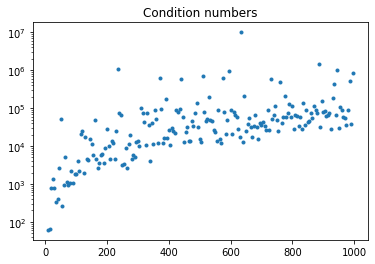

In [24]:
plt.semilogy(n_vector, cond_array, '.')
plt.title('Condition numbers')
pass

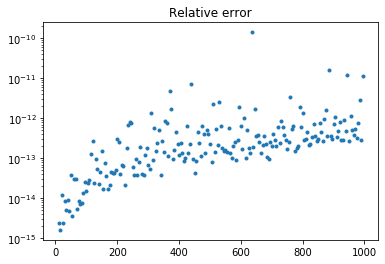

In [25]:
plt.semilogy(n_vector, err_array, '.')
plt.title('Relative error')
pass

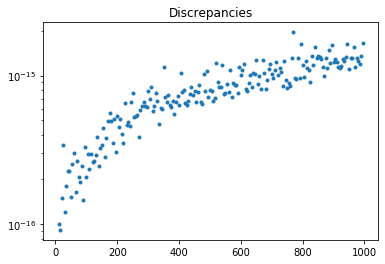

In [26]:
plt.semilogy(n_vector, discr_array, '.')
plt.title('Discrepancies')
pass

Обратим внимание, что для случайных матриц число обусловленности растет не очень сильно. Для $n=1000$ оно достигает значения порядка $10^6$. Как следствие, получаем небольшие относительные ошиибки порядка $10^{-10}$. Относительные невязки не првеосходят по порядку величины $10^{-15}$.

## Эксперимент. Матрицы Гильберта

Теперь проделаем то же самое с матрицами Гильберта.

In [27]:
n_vector = np.arange(1, 18)
cond_array = []
err_array = []
discr_array = []
random.seed(42)
for n in n_vector:
    A = linalg.hilbert(n)
    c = cond(A)
    cond_array.append(c)
    x_prec = random.rand(n)
    b = A @ x_prec
    x_comp = linalg.solve(A, b)
    err = linalg.norm(x_comp - x_prec)/linalg.norm(x_prec)
    err_array.append(err)
    discr = linalg.norm(A.dot(x_comp) - b)/linalg.norm(b)
    discr_array.append(discr)

C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=2.55091e-17): result may not be accurate.
  if sys.path[0] == '':
C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=1.1721e-18): result may not be accurate.
  if sys.path[0] == '':
C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=5.97124e-19): result may not be accurate.
  if sys.path[0] == '':
C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=9.14407e-19): result may not be accurate.
  if sys.path[0] == '':
C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=7.09847e-19): res

Полученные предупреждения вызваны тем, что библиотека обрабатывала плохо обусловленные матрицы.

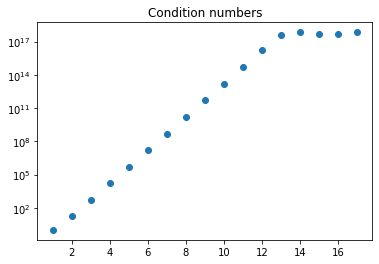

In [28]:
plt.semilogy(n_vector, cond_array, 'o')
plt.title('Condition numbers')
pass

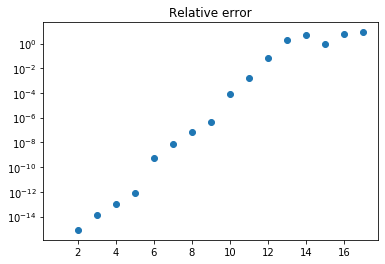

In [29]:
plt.semilogy(n_vector, err_array, 'o')
plt.title('Relative error')
pass

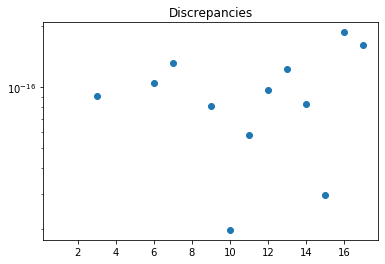

In [30]:
plt.semilogy(n_vector, discr_array, 'o')
plt.title('Discrepancies')
pass

Число обусловленности и относительная ошибка при решении с.л.у. с матрицами Гильберта растут экспоненциально от числа переменных. Кажущаяся остановка в росте на графике числа обусловленности при $n\ge 14$ объясняется тем, что сами числа вычислены некорректно (в силу ошибок окргуления, накопленных из-за громадного числа обусловленности). Обратите внимание, что несмотря на огромные значения числа обусловленности и относительной ошибки величина невязки остается крайне малой - порядка $10^{16}$.

## Выводы

* Решение с.л.у. – одна из самых частно возникающих на практике задач.
* Число обусловленности ${\rm cond} A = \|A\|\cdot \|A^{-1}\|$ можно рассматривать как меру близости матрицы к вырожденной. Чем больше число обусловленности, тем матрица ближе к вырожденной. У вырожденных матриц число обусловленности равно бесконечности.
* Число обусловленности это – мера чувствительности относительной ошибки в ответе по отношению к возмущению в исходных данных. Относительная ошибка в решении может быть в ${\rm cond} A$ раз больше относительных возмущений в коэффициентах системы.
* Относительная ошибка при решении с.л.у. методом Гаусса с выбором ведущего элемента по столбцу в плавающей арифметике приблизительно равна ${\rm cond} A \cdot \varepsilon_{\rm M}$.
* Если с.л.у. плохо обусловлена (т.е. ${\rm cond} A$ большое), то в плавающей арифметике ее нельзя точно решить никаким алгоритмом.
* Метод Гаусса с выбором ведущего элемента по столбцу дает маленькую невязку даже для плохо обусловленных систем.